# Исследование объявлений о продаже квартир

Нужно научиться определять рыночную стоимость объектов недвижимости. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

Производим импорт библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [4]:
df.shape

(23699, 22)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [6]:
df.duplicated().sum()

0

### Вывод

Размер: 23699 записей с 22 параметрами. Дубликатов нет. Пропущенные значения есть по ряду параметров. Замечаем артефакты в данных (0 комнат, высота потолка 100 м и тд.). Рассмотрим подробнее и предобработаем проблемные места.

## Предобработка данных

Начнем с осмотра параметров по порядку, которые бросаются в глаза по таблицам выше.

1) Параметр количетсва комнат (столбец rooms)

In [7]:
df['rooms'].value_counts()

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
14       2
11       2
19       1
12       1
16       1
15       1
Name: rooms, dtype: int64

0 - некорректное значение, скорее всего имелось ввиду небольшое помещение, в котором есть одна комната, но при этом нельзя рассматривать официально как однокомнатную квартиру. Проверим какова квадратура подобных помещений.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff62b793210>]],
      dtype=object)

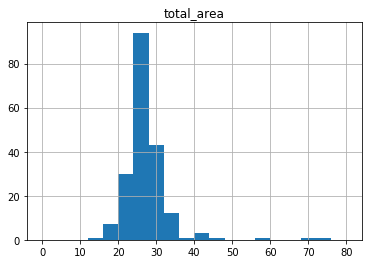

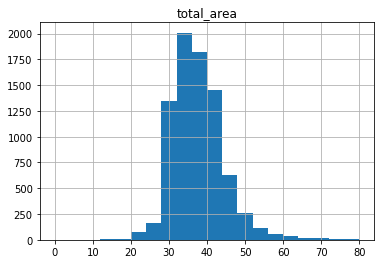

In [8]:
df[df['rooms'] == 0].hist('total_area', bins=20, range=(0,80))
df[df['rooms'] == 1].hist('total_area', bins=20, range=(0,80))

<div class="alert alert-info"> <b>Комментарий студента v1:</b> Добавление кода.</div>

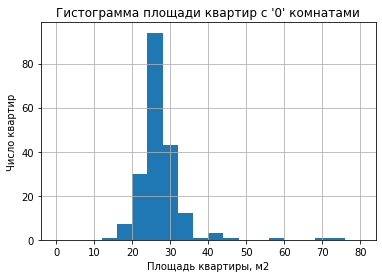

In [9]:
df[df['rooms'] == 0].hist('total_area', bins=20, range=(0,80))
plt.title("Гистограмма площади квартир с '0' комнатами")
plt.xlabel("Площадь квартиры, м2")
plt.ylabel("Число квартир")
plt.show()

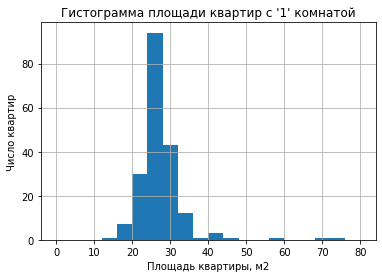

In [10]:
df[df['rooms'] == 0].hist('total_area', bins=20, range=(0,80))
plt.title("Гистограмма площади квартир с '1' комнатой")
plt.xlabel("Площадь квартиры, м2")
plt.ylabel("Число квартир")
plt.show()

In [11]:
df[(df['rooms'] == 0) & (df['studio'] == False) & (df['is_apartment'] == False)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
839,14,1900000.0,35.0,2017-04-14T00:00:00,0,2.7,5.0,15.0,3,False,...,NaN,1.0,поселок Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,7.0


В среднем от 15 до 35 м2, при этом это всегда апартамент либо студия, кроме одного исключения, для которого мало данных. Площадь соизмерима (чуть меньше) с площадью однокомнатной квартиры . Заменим на 0 на 1 комнату.

In [12]:
df.loc[(df['rooms'] == 0), 'rooms'] = 1

In [13]:
df[(df['rooms'] == 0)]['rooms'].count()

0

2) Параметр высота потолков (столбец ceiling_height)

In [14]:
df[df['ceiling_height'].isna() == False]['ceiling_height'].sort_values(ascending=False)

22869    100.00
3148      32.00
22336     32.00
21377     27.50
10773     27.00
          ...  
19329      2.00
2572       2.00
16934      1.75
5712       1.20
22590      1.00
Name: ceiling_height, Length: 14504, dtype: float64

Что-то явно не так с высотой потолков, в выборке присутствуют слишком большие значения, посмотрим на гистограмму.

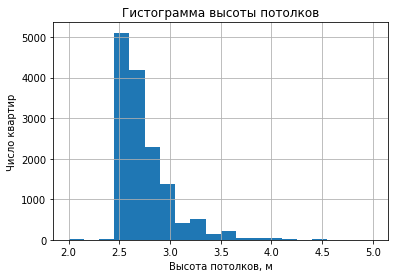

In [15]:
df.hist('ceiling_height', bins=20, range=(2,5))
plt.title("Гистограмма высоты потолков")
plt.xlabel("Высота потолков, м")
plt.ylabel("Число квартир")
plt.show()

Удалим все значения, где высота больше 4. По гистограмме видно, что они выделяются на фоне нормальных значений до 4 м.

In [16]:
df['ceiling_height'].isna().sum()

9195

In [17]:
df = df[(df['ceiling_height'] <= 4) | (df['ceiling_height'].isna() == True)]

In [18]:
df[df['ceiling_height'] > 4]['ceiling_height'].count()

0

In [19]:
df['ceiling_height'].isna().sum()

9195

In [20]:
df['ceiling_height'].describe()

count    14429.000000
mean         2.720710
std          0.258936
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max          4.000000
Name: ceiling_height, dtype: float64

Причина, возможно, заключается в нежелании арендодателей уточнять и вводить высоту квартир. Не будем удалять пропуски, но при этом удалили выбросы. Согласно СНиП 31-01-2003, высота потолков должна быть > 2.5 м, что примерно похоже на медиану нашей выборки. Заменим пропуски на медиану.

In [21]:
df.loc[df['ceiling_height'].isna(), 'ceiling_height'] = df['ceiling_height'].median()

In [22]:
df['ceiling_height'].isna().sum()

0

3) floors_total - общее количество этажей

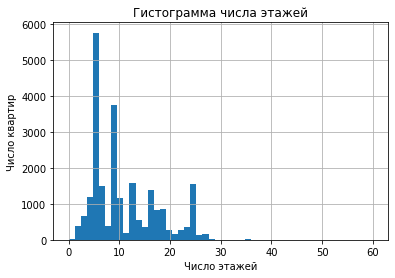

In [23]:
df.hist('floors_total', bins=50, range=(0,df['floors_total'].max()))
plt.title("Гистограмма числа этажей")
plt.xlabel("Число этажей")
plt.ylabel("Число квартир")
plt.show()

Проверим кол-во пропущенных значений по столбцу floors_total

In [24]:
df['floors_total'].isna().sum()

86

Всего 86 записей, не критично, удаляем, так как сложно заменить на что-то конкретное в связи с отсутствием данных, по которым можно было провести аналогию (например, адрес дома). Возможно, в данных объявлениях только один этаж, но удаление не сильно повлияет на исследование.

In [25]:
df = df[df['floors_total'].isna() == False]

In [26]:
df['floors_total'].isna().sum()

0

4) living_area - жилая площадь

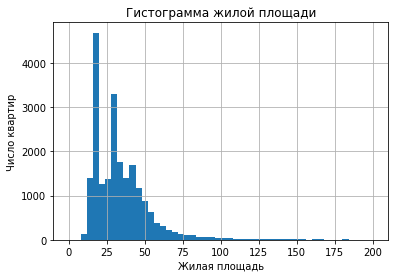

In [27]:
df.hist('living_area', bins=50, range=(0,200))
plt.title("Гистограмма жилой площади")
plt.xlabel("Жилая площадь")
plt.ylabel("Число квартир")
plt.show()

In [28]:
print('Число пропущенных значений для столбца living area составляет: {}'.format(df['living_area'].isna().sum()))
print('Доля пропущенных значений для столбца living area составляет: {}'.format(df['living_area'].isna().sum() / df.shape[0]))

Число пропущенных значений для столбца living area составляет: 1864
Доля пропущенных значений для столбца living area составляет: 0.07919109525023367


In [29]:
df.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
total_images,1.000000,0.102789,0.114391,0.096914,0.049328,0.010338,0.103523,0.032765,-0.027266,-0.024396,0.104418,0.117742,-0.002424,-0.047083,0.020560,-0.005722,-0.011715,-0.003923,-0.027737
last_price,0.102789,1.000000,0.646742,0.360667,0.273601,-0.003712,0.556120,0.027684,-0.025344,-0.008522,0.514782,0.032312,-0.025436,-0.204567,0.148242,-0.013782,0.160629,-0.085623,0.077262
total_area,0.114391,0.646742,1.000000,0.763151,0.385645,-0.074000,0.937951,-0.025346,-0.073401,-0.034814,0.606966,0.056217,-0.029580,-0.230034,0.163527,-0.016119,0.165433,-0.101373,0.145967
rooms,0.096914,0.360667,0.763151,1.000000,0.250643,-0.222986,0.855276,-0.149246,-0.079728,-0.044636,0.266000,0.025455,-0.063738,-0.185631,0.136310,-0.052102,0.094484,-0.060132,0.124223
ceiling_height,0.049328,0.273601,0.385645,0.250643,1.000000,-0.078478,0.373181,-0.045108,0.005683,-0.000928,0.334223,-0.022802,-0.083530,-0.299936,0.229536,-0.059541,0.192305,-0.115896,0.109923
floors_total,0.010338,-0.003712,-0.074000,-0.222986,-0.078478,1.000000,-0.169430,0.677737,0.070849,0.049428,0.167045,0.193414,0.108232,0.017791,-0.252761,0.096381,-0.121862,0.039469,-0.051164
living_area,0.103523,0.556120,0.937951,0.855276,0.373181,-0.169430,1.000000,-0.098905,-0.058092,-0.033718,0.422177,0.023583,-0.057662,-0.230194,0.183137,-0.046853,0.151643,-0.082497,0.140118
floor,0.032765,0.027684,-0.025346,-0.149246,-0.045108,0.677737,-0.098905,1.000000,0.036133,0.034599,0.136226,0.172746,0.072521,0.008053,-0.164328,0.072082,-0.075412,0.025836,-0.038210
studio,-0.027266,-0.025344,-0.073401,-0.079728,0.005683,0.070849,-0.058092,0.036133,1.000000,-0.004175,NaN,0.032567,-0.021287,-0.005830,-0.032318,0.008569,-0.000986,0.002660,-0.021229
open_plan,-0.024396,-0.008522,-0.034814,-0.044636,-0.000928,0.049428,-0.033718,0.034599,-0.004175,1.000000,NaN,0.018583,-0.013636,-0.004293,-0.010053,0.010696,0.008571,-0.003414,-0.023741


8% пропущенных значений, удалять не будем для сохранения связи по остальным параметрам, при этом можно предложить замену   по таким параметрам, как total_area и rooms, но это может внести искажение в реальную картину (могут влиять и другие факторы), поэтому оставим как есть.

5) is_apartment - является апартаментом.

In [30]:
print('Количество пропущенных значений по столбцу is_apartment: {}'.format(df['is_apartment'].isna().sum()))

Количество пропущенных значений по столбцу is_apartment: 20784


In [31]:
df['is_apartment'].value_counts()

False    2710
True       44
Name: is_apartment, dtype: int64

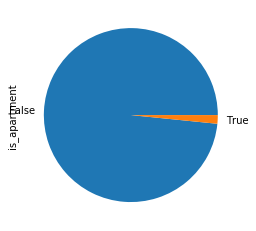

In [32]:
df['is_apartment'].value_counts().plot(kind = 'pie');

Наблюдаем малое количество апартаментов. Вероятно, данные (20784 строк) по данному столбцу могли просто не заполняться ввиду отсутствия необходимости со стороны арендодателя (если это не студия).

6) kitchen_area - квадратура кухни; balcony - количество балконов

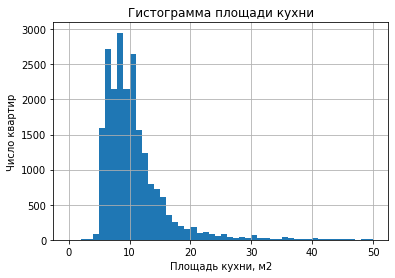

In [33]:
df.hist('kitchen_area', bins=50, range=(0,50))
plt.title("Гистограмма площади кухни")
plt.xlabel("Площадь кухни, м2")
plt.ylabel("Число квартир")
plt.show()

In [34]:
df['kitchen_area'].isna().sum()

2218

Также удалять не будем, важно сохранить связь по параметрам. Проверим, характерны пропуски для студии или аппартаментов. Так можно будет лучше понять, как произвести замену.

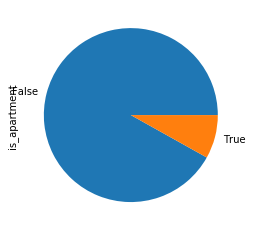

In [35]:
no_kitchen_area = df[df['kitchen_area'].isna()]
no_kitchen_area['is_apartment'].value_counts().plot(kind='pie');

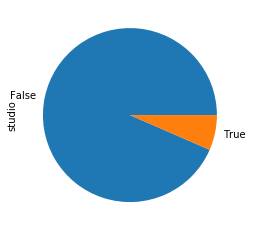

In [36]:
no_kitchen_area['studio'].value_counts().plot(kind='pie');

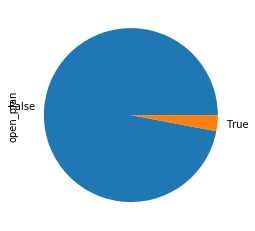

In [37]:
no_kitchen_area['open_plan'].value_counts().plot(kind='pie');

Пропуски характерны для всех групп. Можно предложить замену на медиану по соответствующей группе (апартамент, студия, квартира).

In [38]:
df.loc[(df['kitchen_area'].isna()), 'kitchen_area'] = df[df['studio'] == True]['kitchen_area'].median()
df.loc[(df['kitchen_area'].isna()), 'kitchen_area'] = df[df['is_apartment'] == True]['kitchen_area'].median()
df.loc[(df['kitchen_area'].isna()), 'kitchen_area'] = df[(df['studio'] == False) & df['is_apartment'] == False]['kitchen_area'].median()

/opt/conda/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [39]:
df['kitchen_area'].isna().sum()

0

In [40]:
df['balcony'].isna().sum()

11447

Предполагаем 0 балконов,  если нет информации по данному столбцу. Вероятно, если у арендодателя нет балконов, он не указывал данную информацию.

In [41]:
df.loc[(df['balcony'].isna() == True), 'balcony'] = 0

In [42]:
df['balcony'].isna().sum()

0

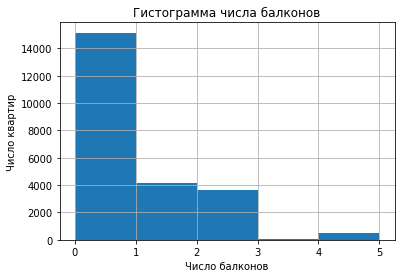

In [43]:
df.hist('balcony', bins=5, range=(0,df['balcony'].max()))
plt.title("Гистограмма числа балконов")
plt.xlabel("Число балконов")
plt.ylabel("Число квартир")
plt.show()

In [44]:
df['balcony'].value_counts()

0.0    15151
1.0     4179
2.0     3644
5.0      301
4.0      182
3.0       81
Name: balcony, dtype: int64

Заменили пропуски, идем дальше

7) locality_name - название населенного пункта

In [45]:
df['locality_name'].isna().sum()

48

48 пропусков, можно удалить, так как не сильно повлияет на итоговый датасет. Необходимо показать данную информацию разработчикам, так как информация без города врят ли сможет найти своего потенциального покупателя.

In [46]:
df = df[df['locality_name'].isna() == False]

In [47]:
df['locality_name'].isna().sum()

0

8) airports_nearest - расстояние до ближайшего аэропорта

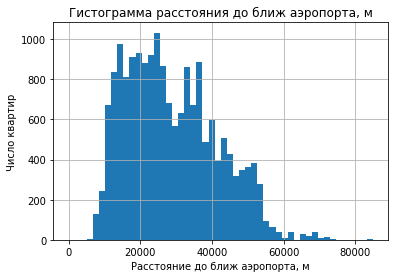

In [48]:
df.hist('airports_nearest', bins=50, range=(0,df['airports_nearest'].max()))
plt.title("Гистограмма расстояния до ближ аэропорта, м")
plt.xlabel("Расстояние до ближ аэропорта, м")
plt.ylabel("Число квартир")
plt.show()

In [49]:
df['airports_nearest'].isna().sum()

5507

In [50]:
print('Минимальное расстоянение до аэропорта равно {0}, а число таких значений равно {1}'.format(df['airports_nearest'].min(), 
                                                                                               df[df['airports_nearest'] == df['airports_nearest'].min()]['airports_nearest'].count()))

Минимальное расстоянение до аэропорта равно 0.0, а число таких значений равно 1


Одно значение с нулевым расстоянием до ближ. аэропорта, удалим его.

In [51]:
df = df[df['airports_nearest'] != 0]

In [52]:
df[df['airports_nearest'] == 0]['airports_nearest'].count()

0

9) cityCenters_nearest - расстояние до ближ. города

In [53]:
df['cityCenters_nearest'].isna().sum()

5487

5487 - немалое количество записей, не будем удалять эти строки для сохранения информации в других столбцах

Заменим расстояние до центра и до ближайшего аэропорта по медиане отдельно взятых городов, для которых есть данные

In [54]:
df_distance_median = df.pivot_table(
    index='locality_name',
    values=['airports_nearest', 'cityCenters_nearest'],
    aggfunc='median'
)
df_distance_median

,airports_nearest,cityCenters_nearest
locality_name,,
Зеленогорск,72282.0,53381.0
Колпино,26232.0,32018.0
Красное Село,25730.0,29155.0
Кронштадт,67847.0,49572.5
Ломоносов,48415.5,51677.0
Павловск,20529.5,32683.0
Петергоф,39231.0,33771.0
Пушкин,15766.0,27920.0
Санкт-Петербург,26781.0,12247.0


In [55]:
city_list = list(df_distance_median.index)


In [56]:
def fill_airports_nearest(row):
    city = row['locality_name']
    
    if city in city_list:
        return df_distance_median.loc[row['locality_name']]['airports_nearest']
    return row['airports_nearest']

def fill_cityCenters_nearest(row):
    city = row['locality_name']
    
    if city in city_list:
        return df_distance_median.loc[row['locality_name']]['cityCenters_nearest']
    return row['cityCenters_nearest']

In [57]:
df.loc[df['airports_nearest'].isna() == True, 'airports_nearest'] = df.apply(fill_airports_nearest, axis=1)
df.loc[df['cityCenters_nearest'].isna() == True, 'cityCenters_nearest'] = df.apply(fill_cityCenters_nearest, axis = 1)

In [58]:
df['airports_nearest'].isna().sum()

5418

In [59]:
df['cityCenters_nearest'].isna().sum()

5418

Немного уменьшили количество пропусков. Посмотрим на имена, которые не вошли в замещение.

In [60]:
df[df['cityCenters_nearest'].isna()==True]['locality_name'].unique()

array(['городской посёлок Янино-1', 'посёлок Мурино', 'Сертолово',
       'деревня Кудрово', 'Коммунар',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кировск',
       'деревня Новое Девяткино', 'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'деревня Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск',
       'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Сясьстрой', 'деревня Старая', 'деревня Лесколово',
       'посёлок Новый Свет', 'Сланцы', 'село Путилово', 'Ивангород',
       'Мурино', 'Шлиссельбург', 'Никольское', 'Сосновый Бор',
       'поселок Новый Свет', 'деревня Оржицы', 'деревня Кальтино',
       'Кудрово', 'поселок 

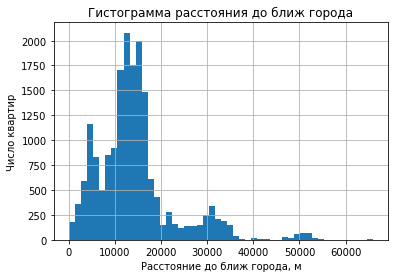

In [61]:
df.hist('cityCenters_nearest', bins=50, range=(0,df['cityCenters_nearest'].max()))
plt.title("Гистограмма расстояния до ближ города")
plt.xlabel("Расстояние до ближ города, м")
plt.ylabel("Число квартир")
plt.show()

Второй пик между 25 000 и 35 000 может обьясняться наличием небольшого поселения у города.

10) parks_around3000 - количесвто парков в 3 км

In [62]:
df['parks_around3000'].isna().sum()

5486

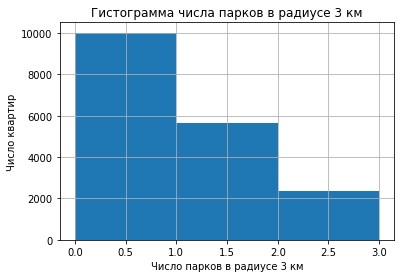

In [63]:
df.hist('parks_around3000', bins=3, range=(0,df['parks_around3000'].max()))
plt.title("Гистограмма числа парков в радиусе 3 км")
plt.xlabel("Число парков в радиусе 3 км")
plt.ylabel("Число квартир")
plt.show()

Оставим пропущенные значения для сохранения связи между параметрами. Данный параметр мог не попасть в датасет по двум причинам. 1) техническая: проблема на сервере, 2) человеческий фактор и проблема сайта: арендодатель не вводит информацию по собственному умыслу, а поле само по себе не является обязательным для заполнения.

11) parks_nearest - расстояние до ближайшего парка

In [64]:
df['parks_nearest'].isna().sum()

15496

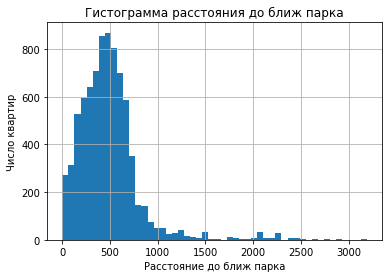

In [65]:
df.hist('parks_nearest', bins=50, range=(0,df['parks_nearest'].max()))
plt.title("Гистограмма расстояния до ближ парка")
plt.xlabel("Расстояние до ближ парка")
plt.ylabel("Число квартир")
plt.show()

Оставим пропущенные значения для сохранения связи между параметрами. Данный параметр мог не попасть в датасет по двум причинам. 1) техническая: проблема на сервере, 2) человеческий фактор и проблема сайта: арендодатель не вводит информацию по собственному умыслу, а поле само по себе не является обязательным для заполнения.

12) ponds_around3000 - количество водоемов в радиусе 3 км

In [66]:
df['ponds_around3000'].isna().sum()

5486

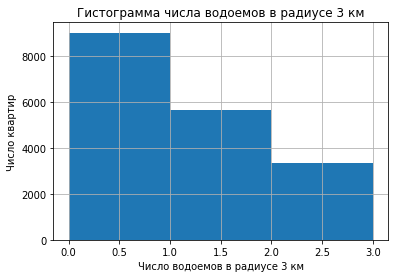

In [67]:
df.hist('ponds_around3000', bins=3, range=(0,df['ponds_around3000'].max()))
plt.title("Гистограмма числа водоемов в радиусе 3 км")
plt.xlabel("Число водоемов в радиусе 3 км")
plt.ylabel("Число квартир")
plt.show()

Оставим пропущенные значения для сохранения связи между параметрами. Данный параметр мог не попасть в датасет по двум причинам. 1) техническая: проблема на сервере, 2) человеческий фактор и проблема сайта: арендодатель не вводит информацию по собственному умыслу, а поле само по себе не является обязательным для заполнения.

13) ponds_nearest - расстояние до ближайшего водоема

In [68]:
df['ponds_nearest'].isna().sum()

14491

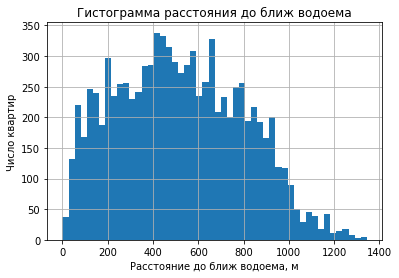

In [69]:
df.hist('ponds_nearest', bins=50, range=(0,df['ponds_nearest'].max()))
plt.title("Гистограмма расстояния до ближ водоема")
plt.xlabel("Расстояние до ближ водоема, м")
plt.ylabel("Число квартир")
plt.show()

Оставим пропущенные значения для сохранения связи между параметрами. Данный параметр мог не попасть в датасет по двум причинам. 1) техническая: проблема на сервере, 2) человеческий фактор и проблема сайта: арендодатель не вводит информацию по собственному умыслу, а поле само по себе не является обязательным для заполнения.

14) days_exposition - дни публикации

In [70]:
df['days_exposition'].isna().sum()

3157

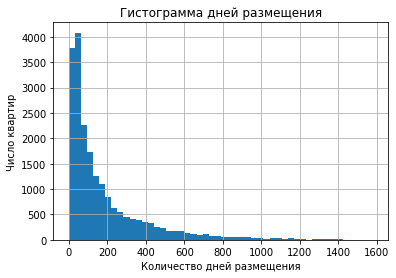

In [71]:
df.hist('days_exposition', bins=50, range=(0,df['days_exposition'].max()))
plt.title("Гистограмма дней размещения")
plt.xlabel("Количество дней размещения")
plt.ylabel("Число квартир")
plt.show()

Параметр Дни публикации можно было бы посчитать при наличии даты снятия объявления. Однако, такого параметра нет, а заменять на медиану - не совсем корректно, количество дней размещения также зависит от сторонних факторов (реклама, привлечение агентов и тд)

Остальные параметры выше должны определяться на этапе размещения обьявления. Удалять пропуски некорректно, так как потеряется немалый объем информации. При этом нельзя спрогнозировать эти параметры по остальным столбцам.

**Определение размерностей**

1) Цену можно представить в целочисленном формате, - так данные будут занимать меньше места, при этом это не сильно скажется на результатах.
2) Количество этажей - можно перевести в целочисленный формат.
3) Параметр, который показывает, является ли данное помещение апартаментом, можно представить как bool, так как принимает два значения True и False 

In [72]:
df['last_price'] = df['last_price'].astype('int') #был float
df['floors_total'] = df['floors_total'].astype('int') #был float
df['is_apartment'] = df['is_apartment'].astype('bool') #был object
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S') #был object

In [73]:
print('Число записей после начальной предобработки {0}'.format(df.shape[0]))

Число записей после начальной предобработки 23489


**Выводы по пункту 2:**

- Большинство параметров имеет значительное количество пропусков, удалять их - потерять бОльшую часть информации, а заменять на 0 или на конкретное значение не всегда возможно, так как они могут зависеть от ряда факторов, которые не присутствуют в выборке (например, по адресу дома можно было бы предположить высоту потолков).

- Некоторые параметры заменять на медиану не совсем корректно, так как они зависят от сторонних факторов (реклама, привлечение агентов и тд для параметра дни публикации)

- Были выдвинуты предположения 1) по количеству балконов = 0, при отсутсвии данных в этом столбце, 2) по количеству комнат = 1, если в данных количество комнат = 0, 3) заполнение расстояния до ближ города и до ближ аэропорта по медианным данным в тех же городах, 4) заполнение медиан площадей кухни по типу жилья, 5) заполнение высоты потолка по медианному значению.

- Для некоторых параметров были удалены 1) пропуски (например, столбцы localoty_name, floors_total) и 2) аномальные значения (высота потолков = 100 м, расстояние до аэропорта 0 м и тд), если их объем незначительный для датасета

- Для некоторых параметров дополнительно предложены варианты замены (например, есть вариант замены пропущенного параметра количества этажей на 1)

- Причинами значительного объема по пропускам могут являться как 1) технические проблемы на сервере, так и 2) арендодатели, которые не заполняют все необходимые поля ("зачем мне заполнять поле студия ли это, если я сдаю 4-комантную квартиру"). Вторая проблема также связана с недочетом на сайте, необходимо ввести обязательность заполнения для размещения объявления.

- Переопределили размерности для некоторых столбцов: Цену можно представить в целочисленном формате, - так данные будут занимать меньше места, при этом это не сильно скажется на результатах. Количество этажей - можно перевести в целочисленный формат. Параметр, который показывает, является ли данное помещение апартаментом, можно представить как bool, так как принимает два значения True и False 

## Расчёты и добавление результатов в таблицу

**В этом пункте добавим следующие параметры:**

1) цена квадратного метра

2) день недели, месяц и год публикации объявления

3) этаж квартиры; варианты — первый, последний, другой

4) соотношение жилой и общей площади, а также отношение площади кухни к общей

5) площадь, цена, число комнат, высота потолков

1) Цена квадратного метра: разделим цену квартиры last_price на общую площадь total_area.

In [74]:
df['price_per_meter'] = round(df['last_price'] / df['total_area'], 2)

2) день недели, месяц и год публикации объявления: из даты публикации first_day_exposition выделим день, месяц и год.

In [75]:
df['day_of_exposition'] = df['first_day_exposition'].dt.weekday
df['month_of_exposition'] = df['first_day_exposition'].dt.month
df['year_of_exposition'] = df['first_day_exposition'].dt.year

3) этаж квартиры; варианты — первый, последний, другой: напишем функцию определения категории по столбцу floor и floors_total.

In [76]:
def category_of_floor_func(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if (floor == 1):
        return 'первый'
    elif (floor == floors_total):
        return 'последний'
    else:
        return 'другой'

In [77]:
df['category_of_floor'] = df.apply(category_of_floor_func, axis = 1)

4) соотношение жилой и общей площади, а также отношение площади кухни к общей: по данным kitchen_area, living_area, total_area определим соотношения

In [78]:
df['kitchen_area_ratio'] = round(df['kitchen_area'] / df['total_area'], 2)
df['living_area_ratio'] = round(df['living_area'] / df['total_area'], 2)

In [79]:
df.shape[0]

23489

In [80]:
df.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,day_of_exposition,month_of_exposition,year_of_exposition,category_of_floor,kitchen_area_ratio,living_area_ratio
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,True,...,2.0,755.0,NaN,120370.37,3,3,2019,другой,0.23,0.47
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,True,...,0.0,NaN,81.0,82920.79,1,12,2018,первый,0.27,0.46
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,True,...,2.0,574.0,558.0,92785.71,3,8,2015,другой,0.15,0.61
3,0,64900000,159.0,2015-07-24,3,2.65,14,NaN,9,True,...,3.0,234.0,424.0,408176.10,4,7,2015,другой,0.07,NaN
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,True,...,1.0,48.0,121.0,100000.00,1,6,2018,другой,0.41,0.32


**Вывод:**

- Метрики успешно посчитаны и добавлены в таблицу

- Для площадей и цены за квадрат применили округление. Этой позволит таблице быть компактней и улучшит ее визуализацию

- Итог метрики известен в том случае, если известны параметры, по которым он считается 

## Исследовательский анализ данных

**В этом пункте рассмотрим:**

1) Гистограммы площади, цены, числа комнат, высоты потолков

2) Изучим время продажи квартиры. Построем гистограмму. Посчитаем среднее и медиану. Опишем, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

3) Уберем редкие и выбивающиеся значения. Опишем обнаруженные особенности.

4) Определим, какие факторы больше всего влияют на стоимость квартиры. Изучим, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучим зависимость от даты размещения: дня недели, месяца и года. Выберем 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах. Выделим населённые пункты с самой высокой и низкой стоимостью жилья (данные по имени в столбце 'locality_name').

5) Выделим квартиры в Санкт-Петербурге ('locality_name'). Выясним, какая область входит в центр. Создадим столбец с расстоянием до центра в километрах: округлим до целых значений. После этого посчитаем среднюю цену для каждого километра. Построим график: как цена зависит от удалённости от центра. Определим границу, где график сильно меняется — это и будет центральная зона.

6) Выделим сегмент квартир в центре. Проанализируем эту территорию и изучим следующие параметры: площадь, цена, число комнат, высота потолков. Также выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Подведем итоги по выводам в центре города и выводам по всему городу.

**1) Гистограммы площади, цены, числа комнат, высоты потолков**

In [81]:
#проанализируем данные по площади total_area
df['total_area'].describe()

count    23489.000000
mean        60.154249
std         35.040251
min         12.000000
25%         40.000000
50%         52.000000
75%         69.500000
max        900.000000
Name: total_area, dtype: float64

In [82]:
print('По столбцу total_area 0.01 персентиль: {0}, а'
      ' 0.99 персентиль {1}'.format(df['total_area'].quantile(0.01), df['total_area'].quantile(0.99)))

По столбцу total_area 0.01 персентиль: 25.356399999999997, а 0.99 персентиль 193.30799999999905


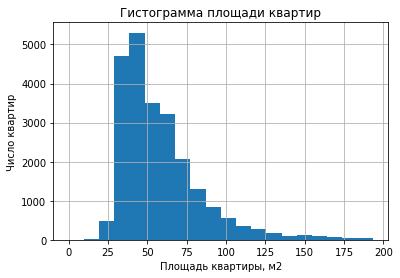

In [83]:
df.hist('total_area', bins = 20, range=(0, df['total_area'].quantile(0.99)))
plt.title("Гистограмма площади квартир")
plt.xlabel("Площадь квартиры, м2")
plt.ylabel("Число квартир")
plt.show()

Наблюдаем распределение Пуассона. По данным: 99-ый персентиль (193.3) намного ниже максимума (900), это сказывается на среднем значении, которое выше медианы. Минимум и максимум в пределах разумного, 12 м2 - похоже на небольшую студию, 900 м2 - сверхпросторное помещение. 

In [84]:
#проанализируем данные по площади last_price
df['last_price'].describe()

count    2.348900e+04
mean     6.492211e+06
std      1.074008e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.625000e+06
75%      6.750000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [85]:
print('По столбцу total_area 0.01 персентиль: {0}, а'
      ' 0.99 персентиль {1}'.format(df['last_price'].quantile(0.01), df['last_price'].quantile(0.99)))

По столбцу total_area 0.01 персентиль: 1000000.0, а 0.99 персентиль 35000000.0


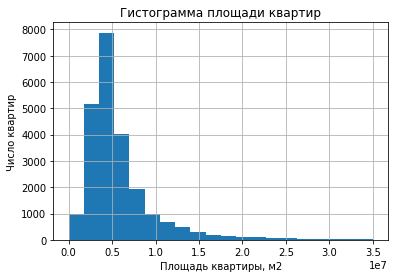

In [86]:
df.hist('last_price', bins = 20, range=(0, df['last_price'].quantile(0.99)))
plt.title("Гистограмма площади квартир")
plt.xlabel("Площадь квартиры, м2")
plt.ylabel("Число квартир")
plt.show()

Наблюдаем распределение Пуассона. По данным: 99-ый персентиль (3.5e+07) намного ниже максимума (7.63e+08), это сказывается на среднем значении, которое выше медианы.

In [87]:
#проанализируем данные по площади rooms
df['rooms'].describe()

count    23489.000000
mean         2.076887
std          1.064049
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [88]:
print('По столбцу total_area 0.01 персентиль: {0}, а'
      ' 0.99 персентиль {1}'.format(df['rooms'].quantile(0.01), df['rooms'].quantile(0.99)))

По столбцу total_area 0.01 персентиль: 1.0, а 0.99 персентиль 5.0


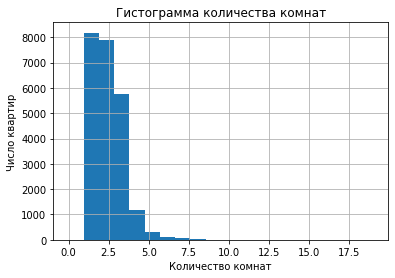

In [89]:
df.hist('rooms', bins = 20, range=(0, df['rooms'].max()))
plt.title("Гистограмма количества комнат")
plt.xlabel("Количество комнат")
plt.ylabel("Число квартир")
plt.show()

Наблюдаем распределение, близкое к распределению Пуассона. По данным: 99-ый персентиль (5 комнат) намного ниже максимума (19 комнат). При этом количество небольших квартир значительно превышает большие, вследствие чего медиана и среднее значение почти равны.

In [90]:
#проанализируем даннперсентильые по площади rooms
df['ceiling_height'].describe()

count    23489.000000
mean         2.693182
std          0.205500
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          4.000000
Name: ceiling_height, dtype: float64

In [91]:
print('По столбцу total_area 0.01 персентиль: {0}, а'
      ' 0.99 персентиль {1}'.format(df['ceiling_height'].quantile(0.01), df['ceiling_height'].quantile(0.99)))

По столбцу total_area 0.01 персентиль: 2.5, а 0.99 персентиль 3.5


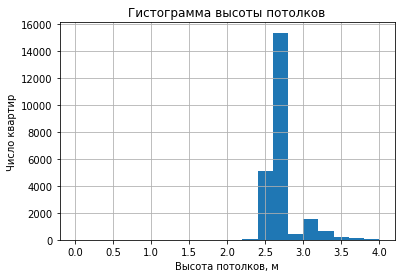

In [92]:
df.hist('ceiling_height', bins = 20, range=(0, df['ceiling_height'].max()))
plt.title("Гистограмма высоты потолков")
plt.xlabel("Высота потолков, м")
plt.ylabel("Число квартир")
plt.show()

In [93]:
df.shape[0]

23489

Наблюдаем распределение, близкое к распределению Пуассона. Однако, также наблюдаем пик при 2.7 м., что может быть вызвано либо стандартизацией планировок определенного класса помещений, либо округлением данных. По данным: 99-ый персентиль (3.5 м) почти равен максимуму (4 м), это сказывается на среднем значении, которое почти равно медиане.

**2) Изучим время продажи квартиры. Построем гистограмму. Посчитаем среднее и медиану. Опишем, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?**

По столбцу days_exposition можно выделить некоторый диапазон значений, который будет отбрасывать выбросы. Возьмем 0.01 персентиль и 0.99 персентиль для гистограмм.

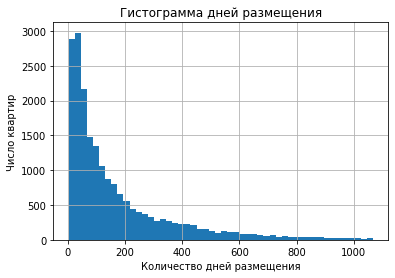

In [94]:
df.hist('days_exposition', bins = 50, range=(df['days_exposition'].quantile(0.01), df['days_exposition'].quantile(0.99)))
plt.title("Гистограмма дней размещения")
plt.xlabel("Количество дней размещения")
plt.ylabel("Число квартир")
plt.show()

In [95]:
df['days_exposition'].describe()

count    20332.000000
mean       180.488393
std        219.460960
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [96]:
print('Первый и 99-ый персентель равны: {} и {}, соответственно'.format(df['days_exposition'].quantile(0.01), df['days_exposition'].quantile(0.99)))

Первый и 99-ый персентель равны: 4.0 и 1066.6899999999987, соответственно


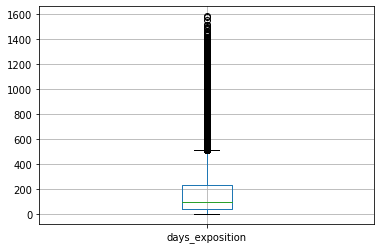

In [97]:
df.boxplot('days_exposition');

Определяем границу по выбросам (можно и по графику выше, если разглядеть:
Верхняя граница: Q3 + 1.5IQR =  231 + 1.5(231 - 45) = 510
Нижняя граница: Q1 - 1.5IQR = 45 - 1.5(231 - 45) < 0 => минимум => 1

Вывод: Среднее значение (180.5) значительно выше медианы (95), данные смещены влево из-за большого объема реализованных помещений в диапазоне Q1 - Q3 дней, а также ряда аномально долгих объявлений. 
Нижнюю границу можно провести по 1 персентелю (4 дня), верхнюю - по Q3 + 1.5IQR (510 дней)

**3) Уберем редкие и выбивающиеся значения. Опишем обнаруженные особенности.**

Помимо фильтрации, проведенной на стадии предобработки, проанализируем выбросы и исключим некорректные значения.

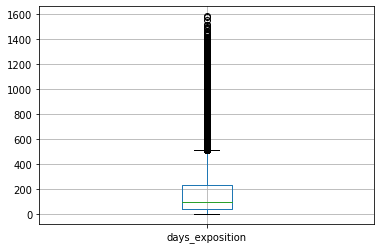

In [98]:
df.boxplot('days_exposition');

In [99]:
df['days_exposition'].describe()

count    20332.000000
mean       180.488393
std        219.460960
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

Видно, что медиана меньше среднего + по данному параметру большое количество выбросов по верхней границе.

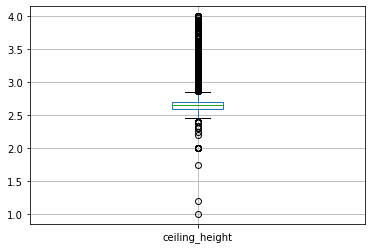

In [100]:
df.boxplot('ceiling_height');

In [101]:
df['ceiling_height'].describe()

count    23489.000000
mean         2.693182
std          0.205500
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          4.000000
Name: ceiling_height, dtype: float64

Видно, что медиана примерно равна среднему + по данному параметру большое количество выбросов по верхней границе + небольшое количество выбросов по нижней границе

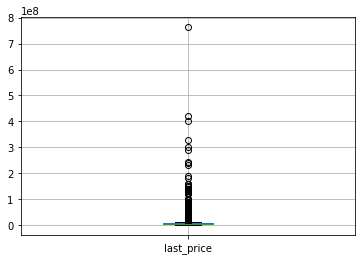

In [102]:
df.boxplot('last_price');

In [103]:
df['last_price'].describe()

count    2.348900e+04
mean     6.492211e+06
std      1.074008e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.625000e+06
75%      6.750000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Видно, что медиана немного меньше среднего + по данному параметру большое количество выбросов по верхней границе.

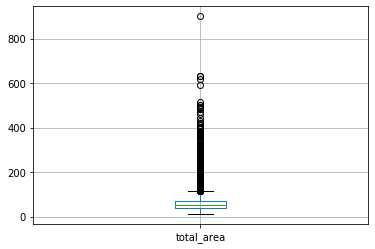

In [104]:
df.boxplot('total_area');

In [105]:
df['total_area'].describe()

count    23489.000000
mean        60.154249
std         35.040251
min         12.000000
25%         40.000000
50%         52.000000
75%         69.500000
max        900.000000
Name: total_area, dtype: float64

Видно, что медиана немного меньше среднего + по данному параметру большое количество выбросов по верхней границе.

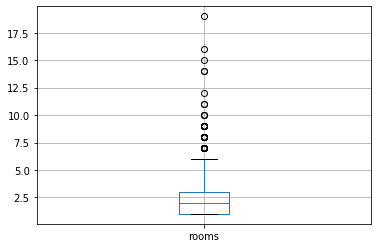

In [106]:
df.boxplot('rooms');

In [107]:
df['rooms'].describe()

count    23489.000000
mean         2.076887
std          1.064049
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Видно, что медиана примерно равна среднему + по данному параметру есть выбросы по верхней границе.

Выбросами будем считать значения вне интервала (Q1 - 1.5IQR; Q3 + 1.5IQR)

In [108]:
#посчитаем долю значений вне диапазона Q1 - Q3 для различных столбцов
days_exposition_IQR = df['days_exposition'].quantile(0.75) - df['days_exposition'].quantile(0.25) 
days_exposition_Q1Q3 = df[(df['days_exposition'] < df['days_exposition'].quantile(0.25) - days_exposition_IQR) | (df['days_exposition'] > df['days_exposition'].quantile(0.75) + days_exposition_IQR)]['days_exposition']
days_exposition_Q1Q3_ratio = days_exposition_Q1Q3.count() / df['days_exposition'].count()
print('Доля выбросов для столбца days_exposition: ', days_exposition_Q1Q3_ratio)

ceiling_height_IQR = df['ceiling_height'].quantile(0.75) - df['ceiling_height'].quantile(0.25) 
ceiling_height_Q1Q3 = df[(df['ceiling_height'] < df['ceiling_height'].quantile(0.25) - ceiling_height_IQR) | (df['ceiling_height'] > df['ceiling_height'].quantile(0.75) + ceiling_height_IQR)]['ceiling_height']
ceiling_height_Q1Q3_ratio = ceiling_height_Q1Q3.count() / df['ceiling_height'].count()
print('Доля выбросов для столбца ceiling_height: ', ceiling_height_Q1Q3_ratio)

last_price_IQR = df['last_price'].quantile(0.75) - df['last_price'].quantile(0.25) 
last_price_Q1Q3 = df[(df['last_price'] < df['last_price'].quantile(0.25) - last_price_IQR) | ((df['last_price'] > df['last_price'].quantile(0.75) + last_price_IQR))]['last_price']
last_price_Q1Q3_ratio = last_price_Q1Q3.count() / df['last_price'].count()
print('Доля выбросов для столбца last_price: ', last_price_Q1Q3_ratio)

total_area_IQR = df['total_area'].quantile(0.75) - df['total_area'].quantile(0.25) 
total_area_Q1Q3 = df[(df['total_area'] < df['total_area'].quantile(0.25) - total_area_IQR) | (df['total_area'] > df['total_area'].quantile(0.75) + total_area_IQR)]['total_area']
total_area_Q1Q3_ratio = total_area_Q1Q3.count() / df['total_area'].count()
print('Доля выбросов для столбца total_area: ', total_area_Q1Q3_ratio)

rooms_IQR = df['rooms'].quantile(0.75) - df['rooms'].quantile(0.25) 
rooms_Q1Q3 = df[(df['rooms'] < df['rooms'].quantile(0.25) - rooms_IQR) | (df['rooms'] > df['rooms'].quantile(0.75) + rooms_IQR)]['rooms']
rooms_Q1Q3_ratio = rooms_Q1Q3.count() / df['rooms'].count()
print('Доля выбросов для столбца rooms: ', rooms_Q1Q3_ratio)

Доля выбросов для столбца days_exposition:  0.11922093252016526
Доля выбросов для столбца ceiling_height:  0.13048661075396994
Доля выбросов для столбца last_price:  0.11290391246966665
Доля выбросов для столбца total_area:  0.08067606113499937
Доля выбросов для столбца rooms:  0.00804631955383371


In [109]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,day_of_exposition,month_of_exposition,year_of_exposition,kitchen_area_ratio,living_area_ratio
count,23489.000000,2.348900e+04,23489.000000,23489.000000,23489.000000,23489.000000,21630.000000,23489.000000,23489.000000,23489.000000,...,7993.000000,18003.000000,8998.000000,20332.000000,2.348900e+04,23489.000000,23489.000000,23489.000000,23489.000000,21630.000000
mean,9.874239,6.492211e+06,60.154249,2.076887,2.693182,10.687215,34.349368,5.881093,10.653872,0.592916,...,490.679470,0.768039,518.459324,180.488393,9.923552e+04,2.567415,6.400272,2017.371323,0.195042,0.564767
std,5.677651,1.074008e+07,35.040251,1.064049,0.205500,6.593849,21.665047,4.872545,5.595349,0.959666,...,341.915319,0.937478,278.150385,219.460960,4.985407e+04,1.788591,3.492722,1.037104,0.082775,0.105294
min,0.000000,1.219000e+04,12.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,...,1.000000,0.000000,13.000000,1.000000,1.118300e+02,0.000000,1.000000,2014.000000,0.020000,0.020000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.600000,2.000000,7.300000,0.000000,...,288.000000,0.000000,293.000000,45.000000,7.656250e+04,1.000000,3.000000,2017.000000,0.140000,0.500000
50%,9.000000,4.625000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,10.000000,0.000000,...,455.000000,0.000000,503.000000,95.000000,9.496568e+04,3.000000,6.000000,2017.000000,0.180000,0.570000
75%,14.000000,6.750000e+06,69.500000,3.000000,2.700000,16.000000,42.200000,8.000000,11.700000,1.000000,...,612.000000,1.000000,731.000000,231.000000,1.141026e+05,4.000000,10.000000,2018.000000,0.240000,0.640000
max,50.000000,7.630000e+08,900.000000,19.000000,4.000000,60.000000,409.700000,33.000000,112.000000,5.000000,...,3190.000000,3.000000,1344.000000,1580.000000,1.907500e+06,6.000000,12.000000,2019.000000,0.980000,1.000000


In [110]:
#посмотрим, есть ли такие объявления, где общая площадь меньше сумм площадей кухни и жил.площади
df[df['total_area'] < df['kitchen_area'] + df['living_area']][['total_area', 'kitchen_area', 'living_area']]

,total_area,kitchen_area,living_area
144,27.00,11.7,15.50
184,30.20,6.2,26.10
349,25.00,11.7,17.00
424,98.00,11.7,88.00
440,27.11,11.7,24.75
...,...,...,...
23420,29.90,11.7,20.30
23442,27.70,11.7,18.00
23579,24.80,11.7,18.00
23592,29.00,11.7,18.00


In [111]:
#проверим, сколько объявлений с высотой потолков меньше 2м.
df[df['ceiling_height'] < 2]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,day_of_exposition,month_of_exposition,year_of_exposition,category_of_floor,kitchen_area_ratio,living_area_ratio
5712,5,1500000,42.8,2017-08-14,2,1.20,2,27.5,1,True,...,NaN,NaN,248.0,35046.73,0,8,2017,первый,0.12,0.64
16934,5,4100000,40.0,2017-10-17,1,1.75,37,17.4,5,True,...,3.0,80.0,71.0,102500.00,1,10,2017,другой,0.21,0.43
22590,16,6000000,55.0,2018-10-31,2,1.00,12,32.4,7,True,...,2.0,289.0,13.0,109090.91,2,10,2018,другой,0.18,0.59


In [112]:
#ограничиваем площадь и цену по 99-му персентелю
df = df[df['total_area'] < df['total_area'].quantile(0.99)]
df = df[df['last_price'] < df['last_price'].quantile(0.99)]

In [113]:
df = df[df['total_area'] >= df['kitchen_area'] + df['living_area']]
df = df[(df['ceiling_height'] >= 2) | (df['ceiling_height'].isna() == True)]

In [114]:
df[df['total_area'] < df['kitchen_area'] + df['living_area']][['total_area', 'kitchen_area', 'living_area']]

,total_area,kitchen_area,living_area


In [115]:
df[df['ceiling_height'] < 2]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,day_of_exposition,month_of_exposition,year_of_exposition,category_of_floor,kitchen_area_ratio,living_area_ratio


In [116]:
df.shape[0]

20831

Вывод: Для ряда параметров 10% всех данных лежат вне интервала (Q1 - 1.5IQR; Q3 + 1.5IQR), при этом не будем ислючать их, так как ряд значений (как очень высокая цена на квартир) действительно может отражать реальность. Однако, так как максимум и 99-ый персентель значительно отличаются для ряда параметров, выставим вернхнюю границу по 99-ому персентелю. В других случаях, например, когда высота потолков < 2 м или общая площадь меньше сумм двух площадей (жилая и кухня), можно избавиться от таких записей, тем более что это не сильно повлияло на общий размер датасета.

**4) Определим, какие факторы больше всего влияют на стоимость квартиры. Изучим, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучим зависимость от даты размещения: дня недели, месяца и года. Выберем 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах. Выделим населённые пункты с самой высокой и низкой стоимостью жилья (данные по имени в столбце 'locality_name'.**

Напишем функцию, которая будет строить график с опцией постройки линии медианы.

In [117]:
def plot_builder(column, xrange, with_median = False, visibility = 0.5, nn_quantile = df['last_price'].quantile(0.99)):
    ax = df.plot(
        x = column,
        y = 'last_price',
        kind = 'scatter',
         style = 'ob',
        alpha = visibility,
        figsize = (8, 8),
        xlim = xrange,
        ylim = (0, nn_quantile),
        grid = True,
        )
    if (with_median):
        (df.groupby(column)['last_price'].agg(['median']).plot(
        ax = ax,
        y = 'median',
        xlim = xrange,
        style = '-og',
        label = 'median',
        legend = True,
        grid = True))  
    plt.show()
        
    if (df['last_price'].corr(df[column]) > 0.7):
        print('Значительная положительная корреляция между двумя параметрами last_price и ',
              column,
              df['last_price'].corr(df[column]))
    elif (df['last_price'].corr(df[column]) > 0.3):
        print('Положительная корреляция между двумя параметрами last_price и ',
              column,
              df['last_price'].corr(df[column]))
    elif (df['last_price'].corr(df[column]) > -0.3):
        print('Околонулевая корреляция между двумя параметрами last_price и ',
              column,
              df['last_price'].corr(df[column]))
    elif (df['last_price'].corr(df[column]) > -0.7):
        print('Отрицательная корреляция между двумя параметрами last_price и ',
              column,
              df['last_price'].corr(df[column]))
    else:
        print('Значительная отрицательная корреляция между двумя параметрами last_price и ',
              column,
              df['last_price'].corr(df[column]))

In [118]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,day_of_exposition,month_of_exposition,year_of_exposition,kitchen_area_ratio,living_area_ratio
count,20831.000000,2.083100e+04,20831.000000,20831.000000,20831.000000,20831.000000,20831.000000,20831.000000,20831.000000,20831.000000,...,7067.000000,16129.000000,7894.000000,17997.000000,20831.000000,20831.000000,20831.000000,20831.000000,20831.000000,20831.000000
mean,10.018770,5.640956e+06,57.569877,2.043301,2.687781,10.619461,32.906501,5.843262,10.200704,0.616725,...,490.828074,0.742885,524.329744,183.629827,95985.906003,2.548221,6.418943,2017.358600,0.188620,0.561527
std,5.640331,3.659257e+06,24.501274,0.967274,0.197973,6.535741,16.563129,4.829017,4.842114,0.966951,...,338.721876,0.921751,277.436670,219.569893,33909.963049,1.782850,3.466920,1.042709,0.072221,0.102163
min,0.000000,1.219000e+04,14.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.300000,0.000000,...,1.000000,0.000000,13.000000,1.000000,111.830000,0.000000,1.000000,2014.000000,0.030000,0.040000
25%,6.000000,3.480000e+06,40.000000,1.000000,2.600000,5.000000,18.600000,2.000000,7.000000,0.000000,...,289.000000,0.000000,303.000000,44.000000,76599.665000,1.000000,3.000000,2017.000000,0.130000,0.490000
50%,10.000000,4.600000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,...,456.000000,0.000000,509.000000,101.000000,94444.440000,2.000000,6.000000,2017.000000,0.170000,0.570000
75%,14.000000,6.600000e+06,68.000000,3.000000,2.700000,15.000000,42.000000,8.000000,11.700000,1.000000,...,612.000000,1.000000,736.000000,237.000000,112692.490000,4.000000,10.000000,2018.000000,0.230000,0.630000
max,50.000000,2.725000e+07,193.200000,11.000000,4.000000,60.000000,164.700000,33.000000,65.000000,5.000000,...,3190.000000,3.000000,1344.000000,1580.000000,640422.350000,6.000000,12.000000,2019.000000,0.720000,0.910000


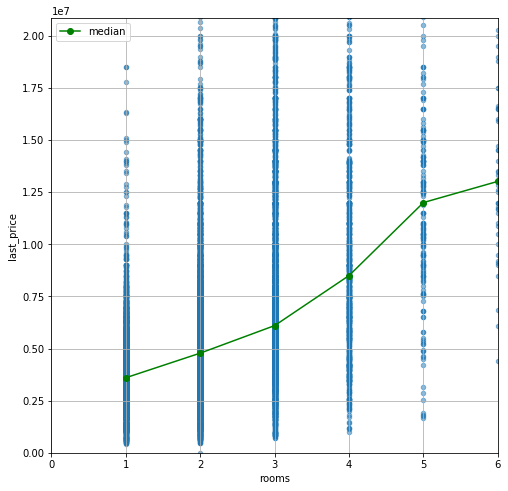

Положительная корреляция между двумя параметрами last_price и  rooms 0.49927289474708625


In [119]:
plot_builder('rooms', xrange=(0, 6), with_median=True)

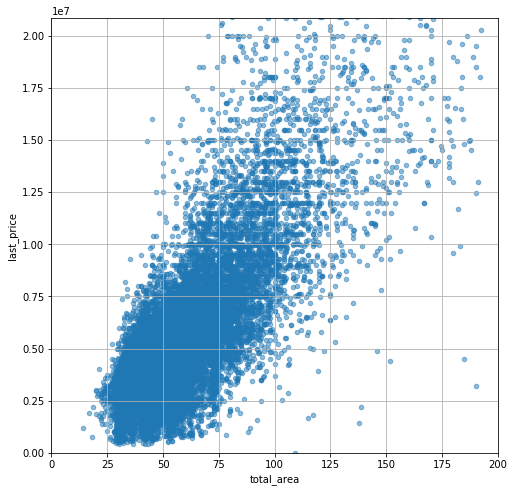

Значительная положительная корреляция между двумя параметрами last_price и  total_area 0.783443071862797


In [120]:
plot_builder('total_area', xrange=(0,200))

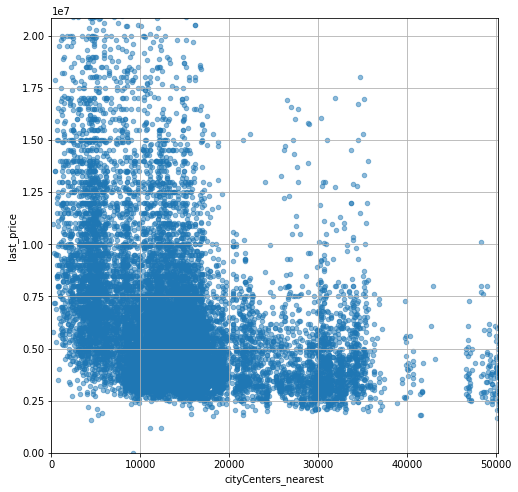

Отрицательная корреляция между двумя параметрами last_price и  cityCenters_nearest -0.35202890944357357


In [121]:
plot_builder('cityCenters_nearest', xrange=(0, df['cityCenters_nearest'].quantile(0.99)))

In [122]:
def numeric_category_of_floor(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if (floor == 1):
        return 1
    elif (floor == floors_total):
        return 3
    else:
        return 2

In [123]:
df['numeric_category_of_floor'] = df.apply(numeric_category_of_floor, axis = 1)

1 - первый этаж, 2 - от 2-го до предпоследнего, 3 - последний этаж

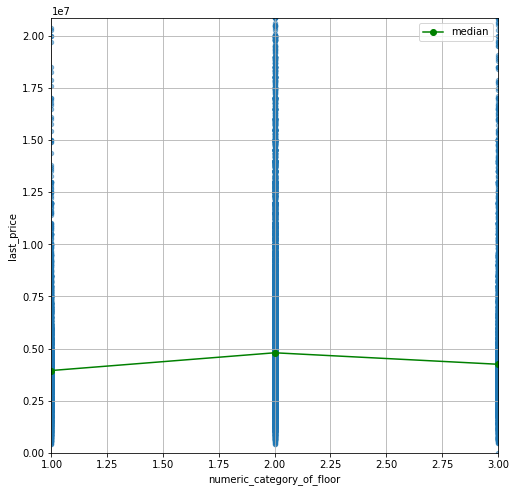

Околонулевая корреляция между двумя параметрами last_price и  numeric_category_of_floor 0.053202261504935754


In [124]:
plot_builder('numeric_category_of_floor', xrange=(1,3), with_median=True)

In [125]:
#удаляем ранее созданный столбец
df = df.drop('numeric_category_of_floor', axis = 1)

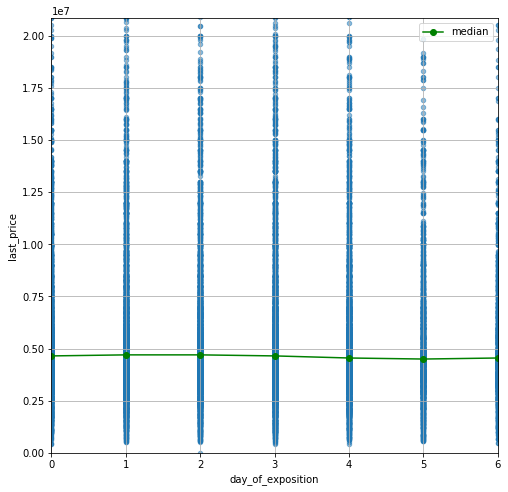

Околонулевая корреляция между двумя параметрами last_price и  day_of_exposition -0.018821972102407727


In [126]:
plot_builder('day_of_exposition', xrange=(0,6), with_median=True)

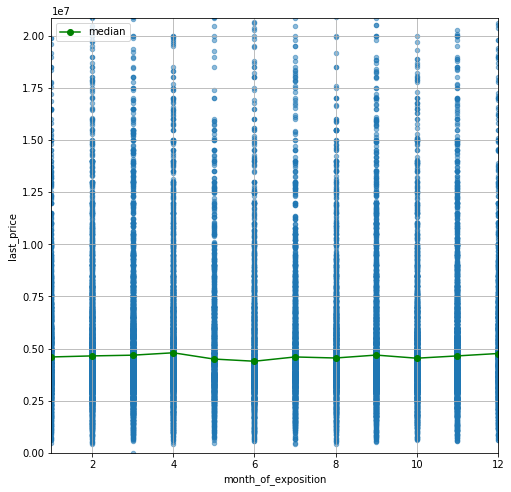

Околонулевая корреляция между двумя параметрами last_price и  month_of_exposition 0.0004189560925241028


In [127]:
plot_builder('month_of_exposition', xrange=(1,12), with_median=True)

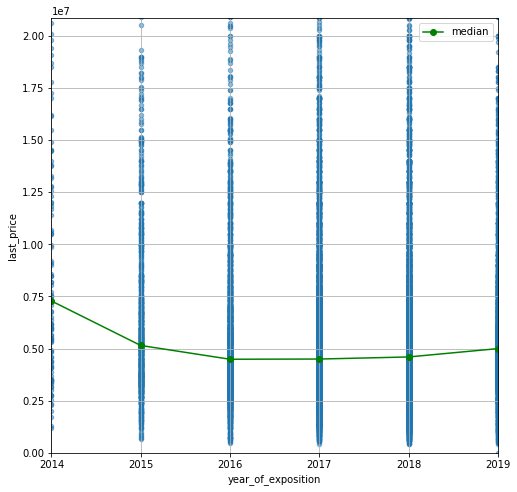

Околонулевая корреляция между двумя параметрами last_price и  year_of_exposition -0.028138596589266963


In [128]:
plot_builder('year_of_exposition', xrange=(2014,2019), with_median=True)

Вывод: Цена прямопропорциональна квадратуре и кол-ву комнат, обратно пропорциональная дистанции от центра города. День, месяц продажи, а также номер этажа (первый и последний чуть дешевле) почти не влияют на стоимость. По годам виден спад в цене между 2014 - 2016, и затем медленный рост к 2019 году. 

In [129]:
#определим топ-10 городов по количеству объявлений
top_rent_cities = (df
                   .groupby('locality_name')['price_per_meter']
                   .agg(['count', 'mean'])
                   .sort_values(by='count', ascending = False)
                  )

top_rent_cities.head(10)

,count,mean
locality_name,,
Санкт-Петербург,13876,109494.574954
посёлок Мурино,407,85467.964816
посёлок Шушары,397,78343.958262
Всеволожск,359,68805.912201
Пушкин,337,102926.358694
Колпино,325,75210.138892
посёлок Парголово,295,90391.229864
Гатчина,287,68509.838397
деревня Кудрово,231,92056.077186


Самая высокая цена квадратного метра в Санкт-Петербурге, самая низкая в Выборге

**5) Выделим квартиры в Санкт-Петербурге ('locality_name'). Выясним, какая область входит в центр. Создадим столбец с расстоянием до центра в километрах: округлим до целых значений. После этого посчитаем среднюю цену для каждого километра. Построим график: как цена зависит от удалённости от центра. Определим границу, где график сильно меняется — это и будет центральная зона.**



In [130]:
df_peter = df[df['locality_name'] == "Санкт-Петербург"]
#df_peter['locality_name'].unique()

In [131]:
#Переведем расстояние до центра в км
df_peter['cityCenters_nearest_km'] = round(df_peter['cityCenters_nearest'] / 1000, 0)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Напишем функцию, которая будет строить график с опцией постройки линии медианы + учитывать данные по центру.

In [132]:
def center_plot_builder(data, column, xrange, with_median = False, visibility = 0.5, nn_quantile = df['last_price'].quantile(0.99)):
    ax = data.plot(
        x = column,
        y = 'last_price',
        kind = 'scatter',
         style = 'ob',
        alpha = visibility,
        figsize = (8, 8),
        xlim = xrange,
        ylim = (0, nn_quantile),
        grid = True,
        )
    if (with_median == True):
        (data.groupby(column)['last_price'].agg(['median']).plot(
        ax = ax,
        y = 'median',
        xlim = xrange,
        style = '-og',
        label = 'median',
        legend = True,
        grid = True))  
    plt.show()
         


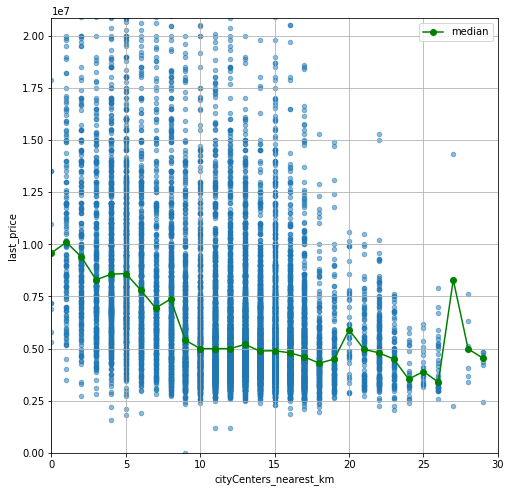

In [133]:
center_plot_builder(df_peter, 'cityCenters_nearest_km', xrange=(0,30), with_median = True)

Ключевые изменения до 9 км - это расстояние и примем за радиус города. *Очень важно понимать, что если не удалять выбросы по 99-му персентелю (для стоимости и площади), то радиус города сузится до 5 км. Это связано с тем, что в центре присутствуют очень большие квартиры с очень большой квадратурой. В данном анализе сверх необычные квартиры были удалены из анализа (по 99-му персентелю).

In [134]:
#создадим датасет для данных по центру
df_peter_center = df_peter[df_peter['cityCenters_nearest_km'] < 9]

In [135]:
df_peter_center

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_per_meter,day_of_exposition,month_of_exposition,year_of_exposition,category_of_floor,kitchen_area_ratio,living_area_ratio,cityCenters_nearest_km
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.0,13,True,...,48.0,121.0,100000.00,1,6,2018,другой,0.41,0.32,8.0
24,8,6500000,97.20,2015-10-31,2,2.65,3,46.5,1,True,...,124.0,265.0,66872.43,5,10,2015,первый,0.20,0.48,2.0
35,6,15500000,149.00,2017-06-26,5,2.65,5,104.0,4,True,...,779.0,644.0,104026.85,0,6,2017,другой,0.11,0.70,4.0
52,20,11795000,136.00,2017-09-22,6,3.00,2,94.0,2,True,...,NaN,NaN,86727.94,4,9,2017,последний,0.08,0.69,7.0
61,18,7990000,74.00,2017-08-24,2,2.65,4,43.0,4,True,...,NaN,609.0,107972.97,3,8,2017,последний,0.27,0.58,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23665,11,4250000,47.00,2016-05-20,1,2.65,6,18.2,1,False,...,519.0,131.0,90425.53,4,5,2016,первый,0.31,0.39,5.0
23681,13,5250000,43.00,2018-05-11,2,2.50,5,29.0,2,True,...,660.0,80.0,122093.02,4,5,2018,другой,0.14,0.67,7.0
23690,3,5500000,52.00,2018-07-19,2,2.65,5,31.0,2,True,...,NaN,15.0,105769.23,3,7,2018,другой,0.12,0.60,6.0
23691,11,9470000,72.90,2016-10-13,2,2.75,25,40.3,7,True,...,806.0,519.0,129903.98,3,10,2016,другой,0.15,0.55,4.0


**6) Выделим сегмент квартир в центре. Проанализируем эту территорию и изучим следующие параметры: площадь, цена, число комнат, высота потолков. Также выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Подведем итоги по выводам в центре города и выводам по всему городу.**

Напишем функцию, которая будет сравнивать распределение параметров для Питера и для центра Питера, для упрощения анализа.

In [136]:
def center_vs_common_hist(data_center, data_common, column, xrange, bins):
    ax = data_center.plot(kind = 'hist',
                    y = column,
                    histtype = 'step',
                    bins = bins,
                    range = xrange,
                    alpha = 0.5,
                    linewidth = 4,
                    grid = True,
                    density = True,
                    legend = True,
                    label = column + ' center'
                    )
    data_common.plot(kind = 'hist',
                    y = column,
                    histtype = 'step',
                    bins = bins,
                    ax = ax,
                    range = xrange,
                    alpha = 0.5,
                    linewidth = 4,
                    grid = True,
                    density = True,
                    legend = True,
                    label = column + ' all')
    

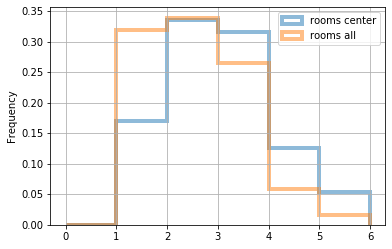

In [137]:
center_vs_common_hist(df_peter_center, df_peter, 'rooms', bins = 6, xrange=(0,6))

В центре больше квартир с бОльшей квадратурой (пик - около 65 м2), при этом в общем датасете по СПБ преобладают небольшие квартиры (пик - около 40 м2).

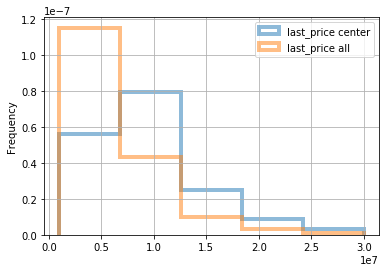

In [138]:
center_vs_common_hist(df_peter_center, df_peter, 'last_price', bins = 5, xrange=(1000000,30000000))

Высокие цены чаще встречаются в центре города

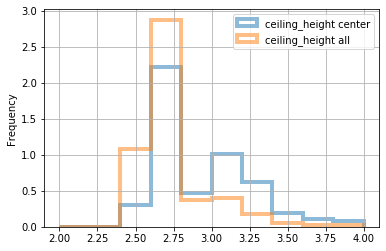

In [139]:
center_vs_common_hist(df_peter_center, df_peter, 'ceiling_height', bins = 10, xrange=(2,4))

В центре города больше квартир с более высокими потолками (но пик по обоим - около 2.7 м).

Выделим факторы, которые влияют на цену в центре города.

In [140]:
def plot_comparer(data_peter_center, data_peter, column, xrange, visibility = 0.1, nn_quantile = df['last_price'].quantile(0.99)):
    #center
    ax = data_peter_center.plot(
        x = column,
        y = 'last_price',
        kind = 'scatter',
        style = 'ow',
        alpha = visibility,
        figsize = (8, 8),
        xlim = xrange,
        ylim = (0, nn_quantile),
        grid = True
        )
    
    (data_peter_center.groupby(column)['last_price'].agg(['median']).plot(
    ax = ax,
    y = 'median',
    xlim = xrange,
    style = '-og',
    label = 'median_SPB_center',
    legend = True,
    grid = True))
        
        #all
    data_peter.plot(
        ax = ax,
        x = column,
        y = 'last_price',
        kind = 'scatter',
        style = 'oy',
        alpha = visibility,
        figsize = (8, 8),
        xlim = xrange,
        ylim = (0, nn_quantile),
        grid = True
        )
    
    (data_peter.groupby(column)['last_price'].agg(['median']).plot(
        ax = ax,
        y = 'median',
        xlim = xrange,
        style = '-xy',
        label = 'median_SPB_all',
        legend = True,
        grid = True)
        )  
    plt.show()
         


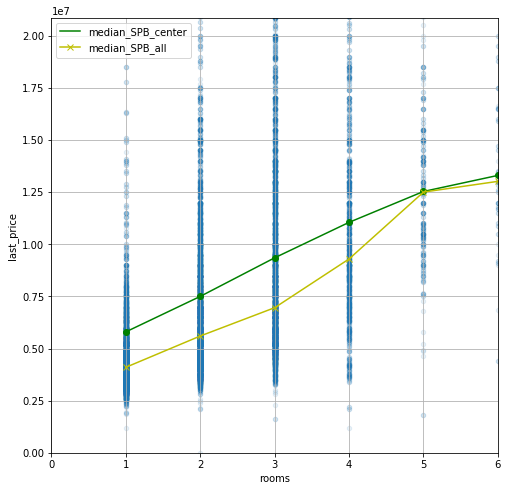

In [141]:
plot_comparer(df_peter_center, df_peter, 'rooms', xrange=(0,6))

Цены растут при увеличении кол-ва комнат, цена выше на аналогичные комнаты в центре. При количестве комнат более 5 медианы совпадают, но это сказывается факт того, что в центре больше квартир с большим количеством комнат.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


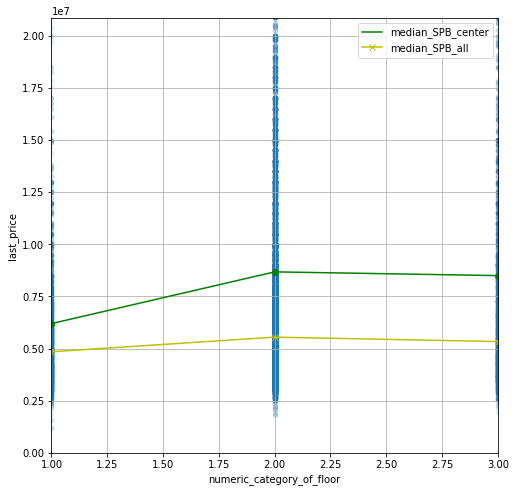

In [142]:
df_peter['numeric_category_of_floor'] = df_peter.apply(numeric_category_of_floor, axis = 1)
df_peter_center['numeric_category_of_floor'] = df_peter_center.apply(numeric_category_of_floor, axis = 1)
plot_comparer(df_peter_center, df_peter, 'numeric_category_of_floor', xrange=(1,3))

Поведение цены в зависимости от категории этажа в центре аналогично с общим поведением (1 - первый этаж, 2 - от второго до предпоследнего, 3 - последний этаж). Однако, в центре снижение квартирных цен на первом этаже выражено более явно.

In [143]:
#удаляем ранее созданный столбец
df_peter = df_peter.drop('numeric_category_of_floor', axis = 1)
df_peter_center = df_peter_center.drop('numeric_category_of_floor', axis = 1)

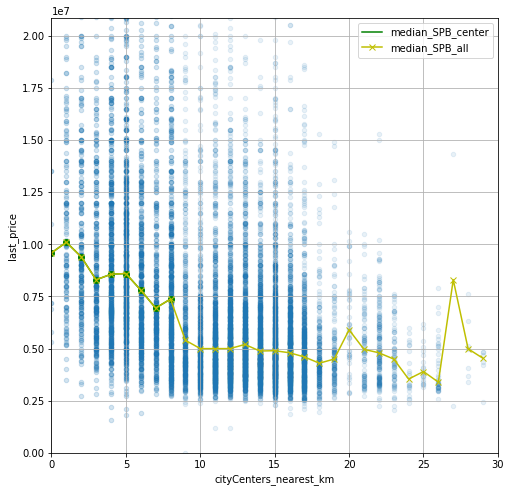

In [144]:
#анализ по удаленности от центра
plot_comparer(df_peter_center, df_peter, 'cityCenters_nearest_km', xrange=(0,30))

Можно заметить резкий спад в цене при удалении от центра, после выхода из некоторой центральной окружности, цена также отрицательную, но почти нулевую корреляцию с дистанцией.

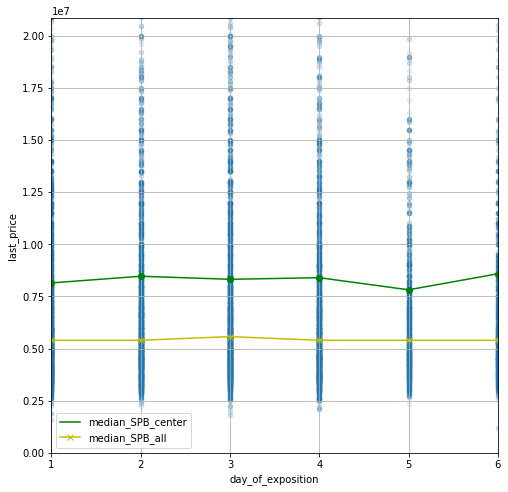

In [145]:
#день продажи
plot_comparer(df_peter_center, df_peter, 'day_of_exposition', xrange=(1,6))

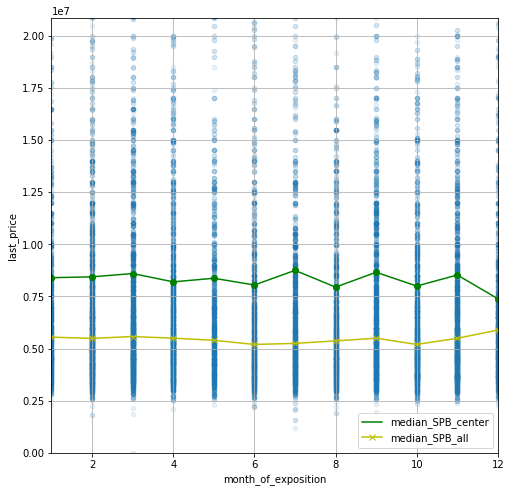

In [146]:
#месяц продажи
plot_comparer(df_peter_center, df_peter, 'month_of_exposition', xrange=(1,12))

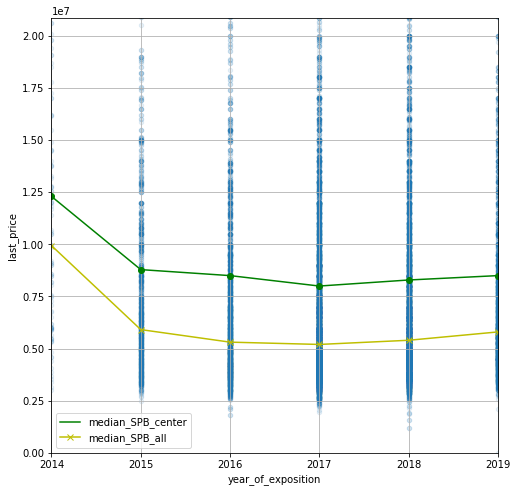

In [147]:
#год продажи
plot_comparer(df_peter_center, df_peter, 'year_of_exposition', xrange=(2014,2019))

Можно заметить слабую корреляцию по дням недели и месяцам, однако по годам видно, что спад 2014-2015 годов затронул все квартиры, включая центр. Далее для двух датасетов заметен медленный подъем.

## Общий вывод

- Данные объявлений по продажам квартир были проанализированы, подготовлены и исследованы. Распределение основных параметров близко к распределению Пуассона.
- В данных присутствует большое количество пропусков (до 50% от исходной выборки. Например, пользователи редко указывают информацию о статусе "является студией" и т.д.). Желательно ввести обязательные поля, чтобы избежать подобных проблем в будущем.
- Выявлены и заменены некорректные значения (0 комнат, высота потолоков 100 м), а также проанализированы выбросы в данных с помощью диаграммы размаха.
- Большинство параметров имеют средние показали выше медианы. Это говорит о неравномерности в параметрах объявлений (цена, площадь). Так, в выборке присутствует большое количество объявлений небольших квартир, а также единицы сверхдорогих и сверхбольших помещений.
- В центре больше квартир с бОльшей квадратурой (пик - около 65 м2), при этом в общем датасете по СПБ преобладают небольшие квартиры (пик - около 40 м2).
- В центре больше квартир с большим количеством комнат (пик - 2 и 3 комнаты). По всему датасету СПБ данные смещены в сторону однокомантных и двукомнатных квартир. 
- Среднее время продажи квартиры 45 - 231 день. Время продажи в 510 дней является аномальным. Среднее количество дней продажи - 180 дней, а медиана объявлений в два раза ниже и составляет 95 дней.
- Квартиры на первом и последнем этаже стоят в среднем чуть ниже квартир на остальных этажах.
- Стоимость квартиры прямо пропорционально площади, количеству комнат, и обратно пропорционально дистанции до центра. Не было выявлено корреляции по дням недели и месяцам, однако по годам выявлен резкий спад в цене в интервале 2014 - 2015 гг. и плавный подъем к 2019 г.
- Максимальная стоимость за м2 - в Санкт-Петербурге (109411.9), минимальная - в Выборге (58260.3).
- По зависимости цены от дистанции от Санкт-Петербурга, была выделена граница города в 9 км, после которой цена за квадратный метр меняется незначительно. При учете всех аномальных данных данная область сужается до 5 км. Это связано с тем, что в центре города присутствуют квартиры, которые являются артефактами для данного датасета.
- В центре города квартиры стоят дороже, при этом корреляции цены и исходных параметров для центра города и общего датасета не сильно отличается. Однако стоит отметить, что спад цен на квартиры на первом этаже значительнее проявляется для центра города.